In [6]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

#### Part I - Data Preparation and Wrangling

***Data Loading and Preparation***:

  - Are there any missing values? Ideally, there shouldn't be any.
  - Are there any variables which are of an incorrect datatype? For e.g. categorical columns are stored as integers in the data set. In case you encounter such issues, make sure you convert the columns to the correct datatypes.

In [7]:
## Load the dataset
app_data = pd.read_csv("data_app.csv")
app_data.head()

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377


In [8]:
# Check for missing values
missing_values = app_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
data_types = app_data.dtypes
print("\nData Types:\n", data_types)


Missing Values:
 CustomerID     0
Adopt          0
Gender         0
Age            0
Nationality    0
Loyalty        0
Tenure         0
Post           0
NumBookings    0
Spending       0
dtype: int64

Data Types:
 CustomerID      int64
Adopt           int64
Gender         object
Age             int64
Nationality     int64
Loyalty         int64
Tenure          int64
Post            int64
NumBookings     int64
Spending        int64
dtype: object


##### Record your observations

In [9]:
# Convert categorical columns to the correct data type
# For example, if 'Gender' is stored as an integer, you can convert it to a categorical type
app_data['Gender'] = app_data['Gender'].astype('category')

# Verify the changes
print("\nUpdated Data Types:\n", app_data.dtypes)


Updated Data Types:
 CustomerID        int64
Adopt             int64
Gender         category
Age               int64
Nationality       int64
Loyalty           int64
Tenure            int64
Post              int64
NumBookings       int64
Spending          int64
dtype: object


#### Part II: Exploratory Data Analysis

***Univariate Analysis I: Data summary of customers’ characteristics***

   - Use appropriate tables for the summary statistics and charts and describe the customers’ characteristics. You may restrict yourself to the univariate analysis of these variables:

          - Demographics: Gender, age, nationality
          - Loyalty membership and tenure with the hotel chain (in months)

In [10]:
# Filter the dataframe
filtered_data = app_data[(app_data['Post'] == 0) | (app_data['Post'] == 1)]

# Display the filtered data
filtered_data.head()


,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377


In [ ]:
### Next let's start making plots to describe each customer characteristic using the above filtered dataframe

In [ ]:
### Hint - If you're unsure what plots/summary statistics to use, inspect the datatypes (categorical or numerical) for the demographic characteristics
### Next, revise your EDA I and EDA II modules to understand which charts are useful for a specific datatype


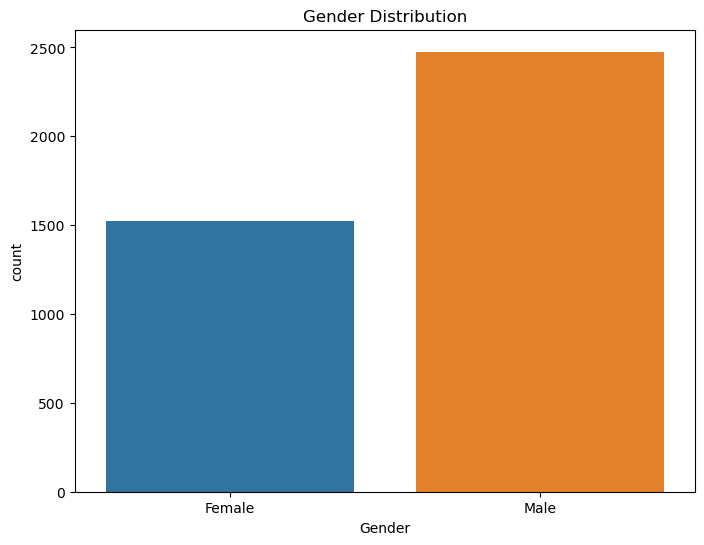

In [11]:
import matplotlib.pyplot as plt

# Countplot for Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=filtered_data)
plt.title('Gender Distribution')
plt.show()


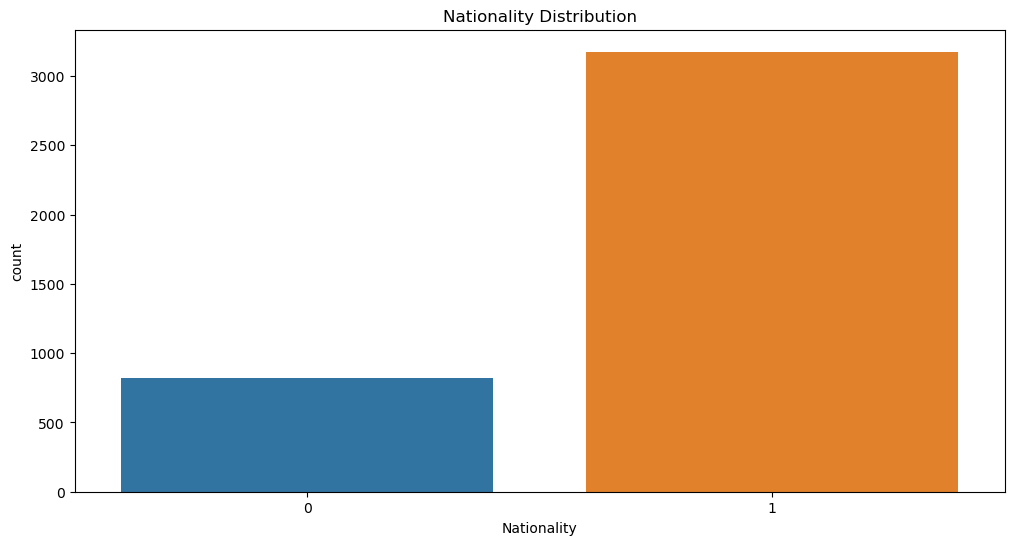

In [12]:
# Countplot for Nationality distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Nationality', data=filtered_data)
plt.title('Nationality Distribution')
plt.show()


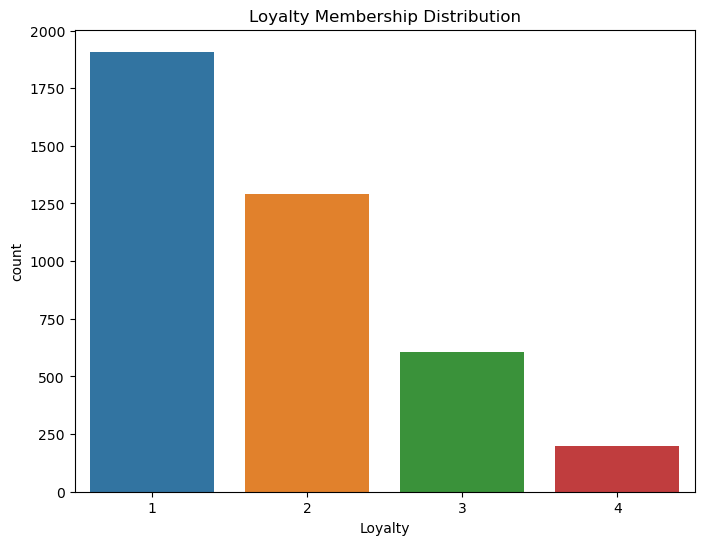

In [13]:
# Countplot for Loyalty membership
plt.figure(figsize=(8, 6))
sns.countplot(x='Loyalty', data=filtered_data)
plt.title('Loyalty Membership Distribution')
plt.show()


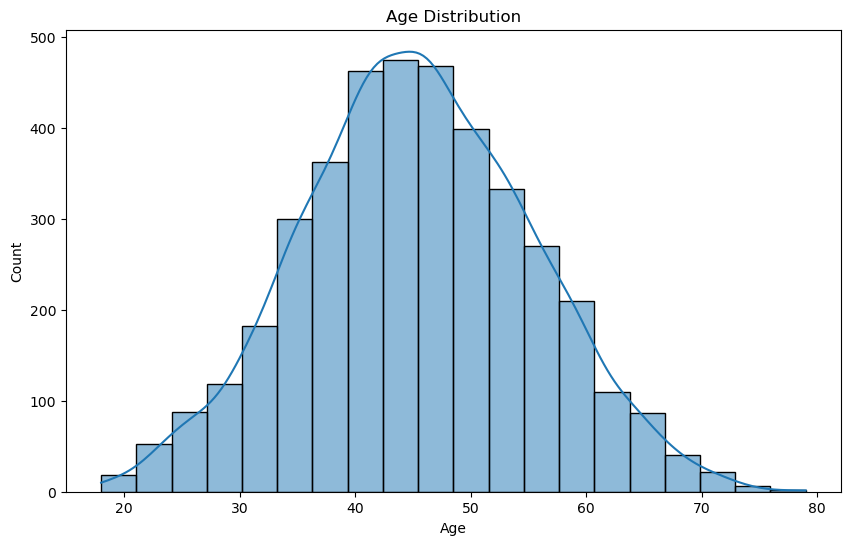

In [14]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


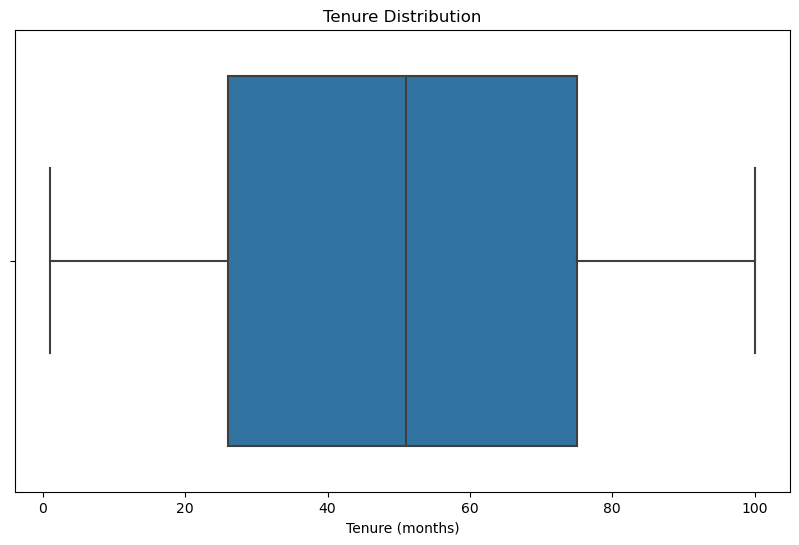

In [15]:
# Histogram for Tenure distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tenure', data=filtered_data)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.show()


#### Part II: Exploratory Data Analysis

***Univariate Analysis II: Data summary of customers’ purchase behavior***

   - Use appropriate tables for the summary statistics and graphs and describe customers’ purchase behavior. You may restrict yourself to the univariate analysis of these variables::

          - Amount spent [Spending]
          - Number of bookings [NumBookings]

In [ ]:
### For amount spent and number of bookings, we will get 2 values for the same customer
### One for Post = 0 and another for Post = 1
### You can analyze the data separately for Post = 0 and Post = 1 phases


In [16]:
### WRITE CODE FOR ANALYSING "SPENDING"
spending_post_0 = filtered_data[filtered_data['Post'] == 0]['Spending']
spending_post_1 = filtered_data[filtered_data['Post'] == 1]['Spending']

print("Summary Statistics for Amount Spent (Post = 0):")
print(spending_post_0.describe())

print("\nSummary Statistics for Amount Spent (Post = 1):")
print(spending_post_1.describe())


Summary Statistics for Amount Spent (Post = 0):
count    2000.000000
mean     4232.173000
std      1703.973864
min       297.000000
25%      2880.000000
50%      4268.500000
75%      5520.500000
max      9330.000000
Name: Spending, dtype: float64

Summary Statistics for Amount Spent (Post = 1):
count     2000.000000
mean      4862.323500
std       1801.456295
min        896.000000
25%       3443.750000
50%       4822.000000
75%       6196.250000
max      11377.000000
Name: Spending, dtype: float64


<Axes: xlabel='Post', ylabel='Spending'>

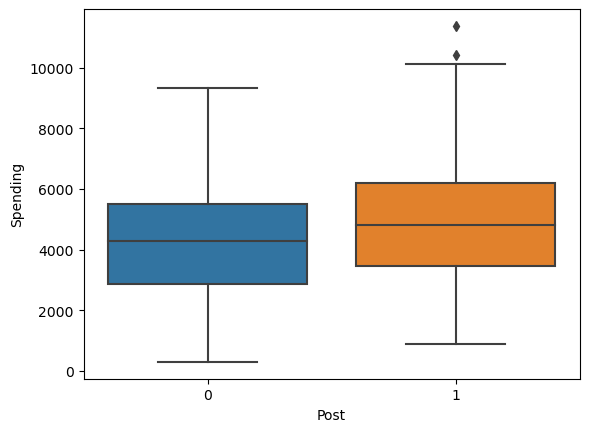

In [17]:


sns.boxplot(x='Post', y='Spending', data=filtered_data)

In [18]:
### WRITE CODE FOR ANALYSING "NUMBOOKINGS"

bookings_post_0 = filtered_data[filtered_data['Post'] == 0]['NumBookings']
bookings_post_1 = filtered_data[filtered_data['Post'] == 1]['NumBookings']

print("Summary Statistics for Number of Bookings (Post = 0):")
print(bookings_post_0.describe())

print("\nSummary Statistics for Number of Bookings (Post = 1):")
print(bookings_post_1.describe())


Summary Statistics for Number of Bookings (Post = 0):
count    2000.000000
mean       15.192500
std         6.023669
min         1.000000
25%        10.000000
50%        15.000000
75%        20.000000
max        31.000000
Name: NumBookings, dtype: float64

Summary Statistics for Number of Bookings (Post = 1):
count    2000.000000
mean       17.300000
std         6.025791
min         4.000000
25%        12.000000
50%        17.000000
75%        22.000000
max        32.000000
Name: NumBookings, dtype: float64


<Axes: xlabel='Post', ylabel='NumBookings'>

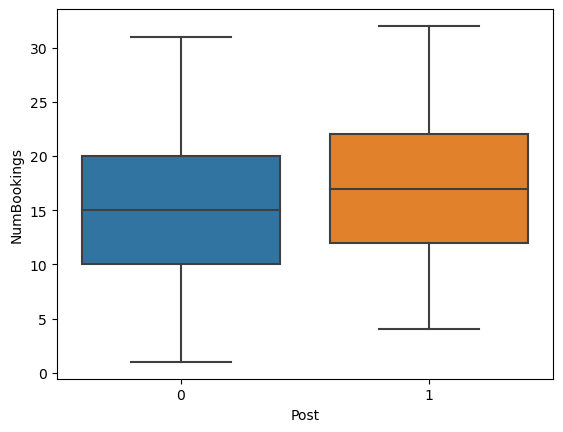

In [19]:
sns.boxplot(x='Post', y='NumBookings', data=filtered_data)


***Multivariate Analysis:***

   - Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers’ characteristics and their purchase behavior. (Generally, bar charts are more informative in the case of categorical variables [e.g., the average of Spending broken up by Gender], while scatterplots convey more information in the case of numerical variables [e.g., Spending versus Age])

Pivot Table - Average Spending by Gender:
            Spending
Gender             
Female  4461.074147
Male    4600.289176


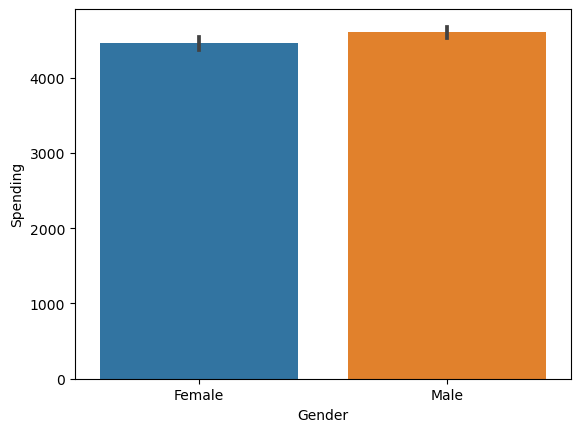

In [20]:
# Analyze the Relationship between Spending and Gender:

# Bar Chart
sns.barplot(x='Gender', y='Spending', data=filtered_data)

# Pivot Table
gender_spending_pivot = pd.pivot_table(filtered_data, values='Spending', index='Gender', aggfunc='mean')
print("Pivot Table - Average Spending by Gender:\n", gender_spending_pivot)


Pivot Table - Average Spending by Age Group:
           Spending
Age               
18-30  3942.077206
31-40  4364.497942
41-50  4495.068005
51-60  4834.301486
61+    5113.176692


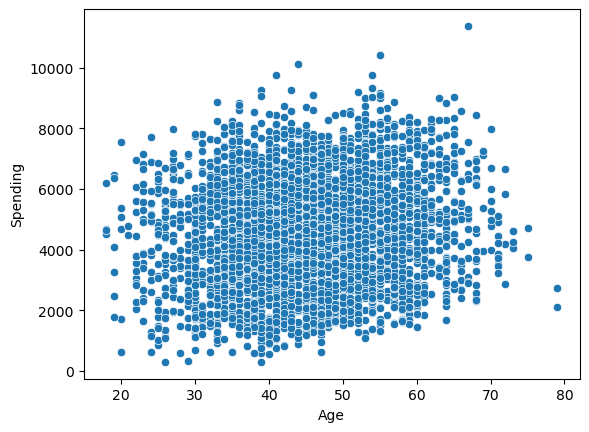

In [21]:
# Analyze the Relationship between Spending and Age:

# Scatterplot
sns.scatterplot(x='Age', y='Spending', data=filtered_data)

# Pivot Table (You can categorize Age into bins for a clearer analysis)
age_bins = pd.cut(filtered_data['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '61+'])
age_spending_pivot = pd.pivot_table(filtered_data, values='Spending', index=age_bins, aggfunc='mean')
print("Pivot Table - Average Spending by Age Group:\n", age_spending_pivot)


Pivot Table - Average Spending by Loyalty Status:
             Spending
Loyalty             
1        4271.416667
2        4621.402326
3        4922.319536
4        5577.979798


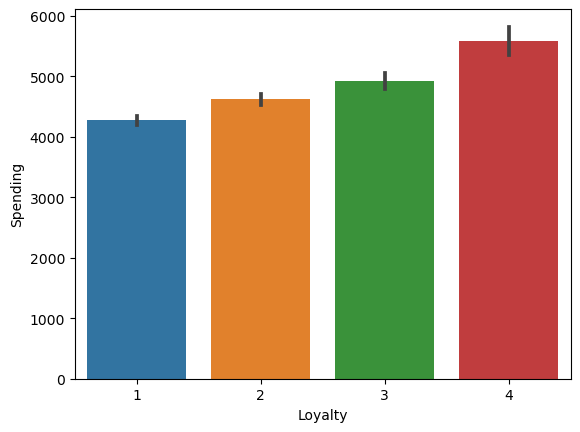

In [22]:
# Analyze the Relationship between Spending and Loyalty:

# Bar Chart
sns.barplot(x='Loyalty', y='Spending', data=filtered_data)

# Pivot Table
loyalty_spending_pivot = pd.pivot_table(filtered_data, values='Spending', index='Loyalty', aggfunc='mean')
print("Pivot Table - Average Spending by Loyalty Status:\n", loyalty_spending_pivot)


- Generate a table of the correlations of all numerical variables of the data set.



Correlation Matrix:
               CustomerID         Adopt           Age   Nationality  \
CustomerID   1.000000e+00  8.660255e-01 -4.260377e-02 -1.708152e-02   
Adopt        8.660255e-01  1.000000e+00 -5.022336e-02 -7.417839e-03   
Age         -4.260377e-02 -5.022336e-02  1.000000e+00  1.589144e-02   
Nationality -1.708152e-02 -7.417839e-03  1.589144e-02  1.000000e+00   
Loyalty      1.792886e-02  1.249943e-02 -1.094271e-02 -7.361306e-04   
Tenure      -1.808458e-02 -2.927254e-02 -1.587762e-02 -7.457786e-03   
Post         1.415726e-15  2.682077e-15  1.003517e-15  6.002789e-16   
NumBookings -2.371725e-02 -3.986292e-02  1.497593e-01  3.173407e-02   
Spending     1.375778e-01  1.452519e-01  1.423946e-01  2.804337e-02   

                  Loyalty        Tenure          Post  NumBookings  Spending  
CustomerID   1.792886e-02 -1.808458e-02  1.415726e-15    -0.023717  0.137578  
Adopt        1.249943e-02 -2.927254e-02  2.682077e-15    -0.039863  0.145252  
Age         -1.094271e-02 -1.587

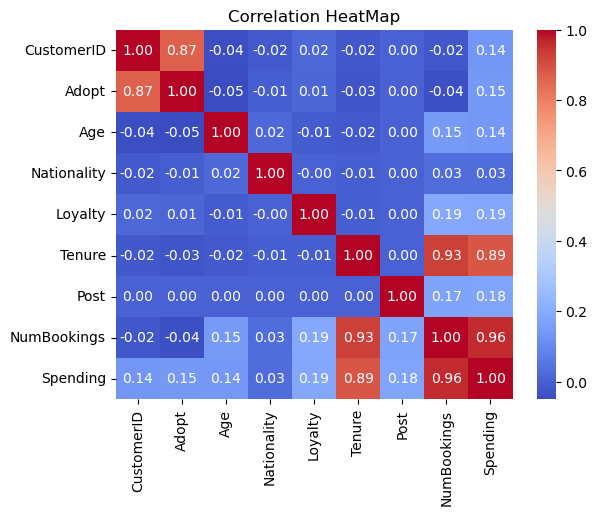

In [23]:
# Subset the dataframe to include only numerical variables
numerical_data = filtered_data.select_dtypes(include=['int64'])

# Create a correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: HeatMap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation HeatMap")
plt.show()


 - Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. Please construct a 95% confidence interval for the difference in means. You may assume independent samples and constant variance. [Note: The above test is to be conducted for the entire data set]

In [28]:
from scipy.stats import ttest_ind

# Separate data for men and women
spending_men = app_data[app_data['Gender'] == 'Male']['Spending']
spending_women = app_data[app_data['Gender'] == 'Female']['Spending']

# Independent samples t-test
t_stat, p_value = ttest_ind(spending_men, spending_women, equal_var=True)

# Degrees of freedom
df = len(spending_men) + len(spending_women) - 2

# Confidence interval
confidence_interval = t.interval(0.95, df, loc=spending_men.mean() - spending_women.mean(), scale=np.sqrt((np.var(spending_men, ddof=1) / len(spending_men)) + (np.var(spending_women, ddof=1) / len(spending_women))))

# Display results
print("T-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("\n95% Confidence Interval for the Difference in Means:")
print(confidence_interval)


T-Test Results:
T-statistic: 2.4018925119605847
P-value: 0.016355851334947116

95% Confidence Interval for the Difference in Means:
(25.318991150883804, 253.11106706679823)


#### Part III: Statistical Analysis

***After-Only design***
   - To determine the treatment effect of customers’ adoption of the app on their spending with the hotel chain, construct a pivot table of average Spending broken up by Adopt and Post. What is the difference between the treatment and control groups’ spending in the Post =1 period? This is the treatment effect, assuming the experiment is of an After-Only design.

In [32]:
import pandas as pd
import pingouin as pg

# Constructing a Pivot Table
pivot_table = pd.pivot_table(filtered_data, values='Spending', index=['Adopt', 'Post'], aggfunc='mean')
print("Pivot Table - Average Spending by Adopt and Post:")
print(pivot_table)

# Extract spending data for the treatment and control groups in Post=1 period
spending_treatment = filtered_data[(filtered_data['Adopt'] == 1) & (filtered_data['Post'] == 1)]['Spending']
spending_control = filtered_data[(filtered_data['Adopt'] == 0) & (filtered_data['Post'] == 1)]['Spending']


Pivot Table - Average Spending by Adopt and Post:
            Spending
Adopt Post          
0     0     4188.753
      1     4388.343
1     0     4275.593
      1     5336.304


  - Is the above treatment effect statistically significant? Perform the necessary hypothesis test and construct a 95% confidence interval for the difference. Take the level of significance as 0.05

In [31]:
### Hint - Once again, you can use the ttest method in the pingouin package to perform this task quickly.


# Perform independent samples t-test
ttest_result = pg.ttest(spending_treatment, spending_control)

# Display the t-test results
print("\nT-Test Results:")
print(ttest_result)



T-Test Results:
                T   dof alternative         p-val             CI95%   cohen-d  \
T-test  12.193523  1998   two-sided  4.868695e-33  [795.5, 1100.43]  0.545311   

             BF10  power  
T-test  4.544e+29    1.0  


***Before-After design***


- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.


In [38]:
# Step 1: Create temporary dataframes for Post=1 and Post=0
post_1_df = filtered_data[filtered_data['Post'] == 1][['CustomerID', 'Spending']]
post_0_df = filtered_data[filtered_data['Post'] == 0][['CustomerID', 'Spending']]

# Step 2: Merge the dataframes on CustomerID
merged_df = pd.merge(post_1_df, post_0_df, on='CustomerID', suffixes=('_post_1', '_post_0'))

# Step 3: Identify and keep necessary columns
# In this case, we want to keep 'CustomerID', 'Spending_post_1', and 'Spending_post_0'
merged_df = merged_df[['CustomerID', 'Spending_post_1', 'Spending_post_0']]

# Step 4: Create a new column for the difference in spending
merged_df['Diff'] = merged_df['Spending_post_1'] - merged_df['Spending_post_0']


The above suggested approach is one of the many ways in which you can complete this task. Here are some helpful links for understanding how to use the `pandas.merge` method
- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)
- [Youtube tutorial](https://www.youtube.com/watch?v=h4hOPGo4UVU)

---

- Compute the average spending difference between those with Adopt = 1 and those with Adopt = 0 in both the Post = 1 and Post = 0 periods. Call these differences Difference1 and Difference0. Compute the difference between these two differences as Difference1 – Difference0. This is the treatment effect in the Before-After design.

In [37]:

# Compute average spending difference for Adopt=1 and Adopt=0 in both periods
avg_diff_adopt_1_post_1 = merged_df['Diff'].mean()

# Display the results
print("Average Spending Difference for Adopt=1 in Post=1:", avg_diff_adopt_1_post_1)


Average Spending Difference for Adopt=1 in Post=1: 630.1505


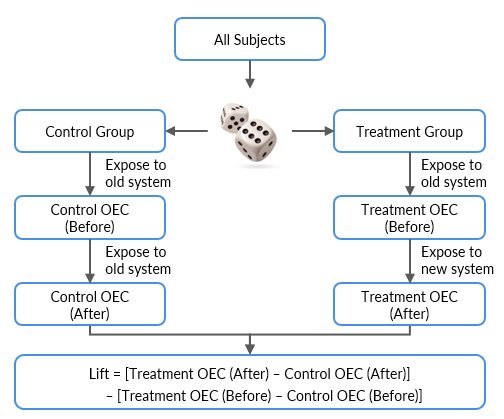

In case the above image isn't opening please use this [link](https://images.upgrad.com/48d5bfcc-c3e5-4ef3-9c5a-460568c08480-Image2.png)


In [39]:
# Calculate the average spending for control group (Adopt = 0) in the period Post = 0
control_group_post_0 = app_data[(app_data['Adopt'] == 0) & (app_data['Post'] == 0)]
avg_spending_control_post_0 = control_group_post_0['Spending'].mean()

# Calculate the average spending for treatment group (Adopt = 1) in the period Post = 0
treatment_group_post_0 = app_data[(app_data['Adopt'] == 1) & (app_data['Post'] == 0)]
avg_spending_treatment_post_0 = treatment_group_post_0['Spending'].mean()

# Calculate the difference between the above two values for Post = 0 (Difference0)
difference_0 = avg_spending_treatment_post_0 - avg_spending_control_post_0

# Calculate the average spending for control group (Adopt = 0) in the period Post = 1
control_group_post_1 = app_data[(app_data['Adopt'] == 0) & (app_data['Post'] == 1)]
avg_spending_control_post_1 = control_group_post_1['Spending'].mean()

# Calculate the average spending for treatment group (Adopt = 1) in the period Post = 1
treatment_group_post_1 = app_data[(app_data['Adopt'] == 1) & (app_data['Post'] == 1)]
avg_spending_treatment_post_1 = treatment_group_post_1['Spending'].mean()

# Calculate the difference between the above two values for Post = 1 (Difference1)
difference_1 = avg_spending_treatment_post_1 - avg_spending_control_post_1

# Calculate the overall treatment effect (Difference1 - Difference0)
treatment_effect = difference_1 - difference_0

# Display the results
print("Average Spending Control Post=0:", avg_spending_control_post_0)
print("Average Spending Treatment Post=0:", avg_spending_treatment_post_0)
print("Difference0 (Treatment OEC(Before) - Control OEC(Before)):", difference_0)
print("\nAverage Spending Control Post=1:", avg_spending_control_post_1)
print("Average Spending Treatment Post=1:", avg_spending_treatment_post_1)
print("Difference1 (Treatment OEC(After) - Control OEC(After)):", difference_1)
print("\nTreatment Effect (Difference1 - Difference0):", treatment_effect)


Average Spending Control Post=0: 4188.753
Average Spending Treatment Post=0: 4275.593
Difference0 (Treatment OEC(Before) - Control OEC(Before)): 86.84000000000015

Average Spending Control Post=1: 4388.343
Average Spending Treatment Post=1: 5336.304
Difference1 (Treatment OEC(After) - Control OEC(After)): 947.9610000000002

Treatment Effect (Difference1 - Difference0): 861.1210000000001


- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [41]:
import pingouin as pg

# Assuming you have a DataFrame with 'Diff' column, if not use the merged_df DataFrame created earlier
# merged_df = ...

# Perform the t-test for the difference in differences
ttest_result = pg.ttest(merged_df['Diff'], y=0, paired=True)

# Display the t-test results
print(ttest_result)

# Construct a 95% confidence interval for the difference in differences
confidence_interval = pg.compute_bootci(merged_df['Diff'], func='mean', n_boot=10000, method='percentile')
print("\n95% Confidence Interval for the Difference in Differences:")
print(confidence_interval)


C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\pingouin\parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


               T   dof alternative          p-val             CI95%   cohen-d  \
T-test  36.70944  1999   two-sided  5.912560e-226  [596.49, 663.82]  0.820848   

              BF10  power  
T-test  6.613e+221    1.0  

95% Confidence Interval for the Difference in Differences:
[595.79 663.82]
